# Explore here

It's recommended to use this notebook for exploration purposes.

In [ ]:
import os
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# 1) Connect to the database here using the SQLAlchemy's create_engine function

# 2) Execute the SQL sentences to create your tables using the SQLAlchemy's execute function

# 3) Execute the SQL sentences to insert your data using the SQLAlchemy's execute function

# 4) Use pandas to print one of the tables as dataframes using read_sql function


In [2]:
import requests
import time
import pandas as pd
from bs4 import BeautifulSoup

url = " https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
request = requests.get(url, headers = headers)
time.sleep(5)
html = request.text

soup = BeautifulSoup(html, 'html.parser')
soup
tables = soup.find_all('table')
tables


for index, table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
        break

tesla_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")

    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace(",", "")
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({
            "Date": Date,
            "Revenue": Revenue
        }, index = [0])], ignore_index = True)

tesla_revenue.head()






,Date,Revenue
0,2023-12-31,25167
1,2023-09-30,23350
2,2023-06-30,24927
3,2023-03-31,23329
4,2022-12-31,24318


In [3]:

import sqlite3
connection = sqlite3.connect('tesla_revenue.db')
cursor = connection.cursor()
cursor.execute('''CREATE TABLE IF NOT EXISTS revenue (Date TEXT, Revenue INTEGER)''')

for index, row in tesla_revenue.iterrows():
    cursor.execute('''INSERT INTO revenue (Date, Revenue) VALUES (?, ?)''', (row['Date'], row['Revenue']))

connection.commit()

cursor.execute('''SELECT * FROM revenue''')
print("Data in database:")
for row in cursor.fetchall():
    print(row)
connection.close()

Data in database:
('2023-12-31', 25167)
('2023-09-30', 23350)
('2023-06-30', 24927)
('2023-03-31', 23329)
('2022-12-31', 24318)
('2022-09-30', 21454)
('2022-06-30', 16934)
('2022-03-31', 18756)
('2021-12-31', 17719)
('2021-09-30', 13757)
('2021-06-30', 11958)
('2021-03-31', 10389)
('2020-12-31', 10744)
('2020-09-30', 8771)
('2020-06-30', 6036)
('2020-03-31', 5985)
('2019-12-31', 7384)
('2019-09-30', 6303)
('2019-06-30', 6350)
('2019-03-31', 4541)
('2018-12-31', 7226)
('2018-09-30', 6824)
('2018-06-30', 4002)
('2018-03-31', 3409)
('2017-12-31', 3288)
('2017-09-30', 2985)
('2017-06-30', 2790)
('2017-03-31', 2696)
('2016-12-31', 2285)
('2016-09-30', 2298)
('2016-06-30', 1270)
('2016-03-31', 1147)
('2015-12-31', 1214)
('2015-09-30', 937)
('2015-06-30', 955)
('2015-03-31', 940)
('2014-12-31', 957)
('2014-09-30', 852)
('2014-06-30', 769)
('2014-03-31', 621)
('2013-12-31', 615)
('2013-09-30', 431)
('2013-06-30', 405)
('2013-03-31', 562)
('2012-12-31', 306)
('2012-09-30', 50)
('2012-06-30', 27

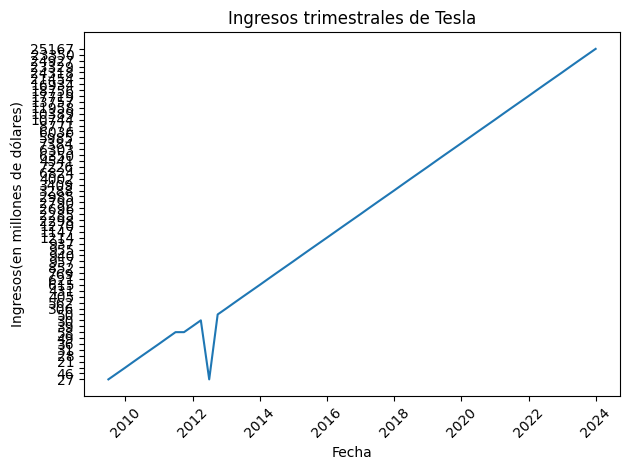

In [5]:
import matplotlib.pyplot as plt

tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

tesla_revenue_sorted = tesla_revenue.sort_values(by='Date')

plt.plot(tesla_revenue_sorted['Date'], tesla_revenue_sorted['Revenue'])

plt.title('Ingresos trimestrales de Tesla')
plt.xlabel('Fecha')
plt.ylabel('Ingresos(en millones de dólares)')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()


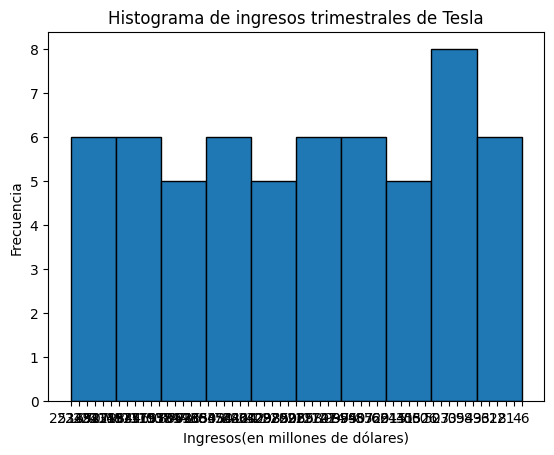

In [6]:
import matplotlib.pyplot as plt

plt.hist(tesla_revenue['Revenue'], bins=10, edgecolor='black')

plt.title('Histograma de ingresos trimestrales de Tesla')
plt.xlabel('Ingresos(en millones de dólares)')
plt.ylabel('Frecuencia')
plt.show()


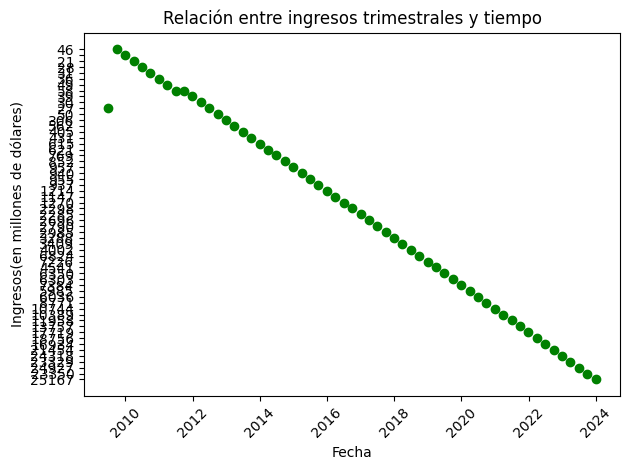

In [7]:
import matplotlib.pyplot as plt

tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

plt.scatter(tesla_revenue['Date'], tesla_revenue['Revenue'], color='green')

plt.title('Relación entre ingresos trimestrales y tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ingresos(en millones de dólares)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
